<a id="home"></a>
# Loss/Cost Function 
Evaluating your machine learning algorithm is an essential part of any project. Your model may give you satisfying results when evaluated using a metric say accuracy_score but may give poor results when evaluated against other metrics such as logarithmic_loss or any other such metric. Most of the times we use classification accuracy to measure the performance of our model, however it is not enough to truly judge our model. In this post, we will cover different types of evaluation metrics available.

### Difference between Loss and Cost function
I want to emphasize this here –  although cost function and loss function are synonymous and used interchangeably, they are different.

A loss function is for a single training example. It is also sometimes called an error function. A cost function, on the other hand, is the average loss over the entire training dataset. The optimization strategies aim at minimizing the cost function.

### Types of Loss/Cost Function
1. **Regression**
    1. [MSE (Mean squared error)](#mse)
    2. [MAE (Mean absolute error](#mae)
    3. [RMSE (Root mean squared error)](#rmse)
    3. [R-Squared](#r2)
    4. [Adjusted R-Squared](#ar2)
2. **Classification**
    1. **Binary**
        1. [Binary Cross Entropy](#bce)
        2. [Hinge Loss](#hl)
        3. [Confusion Matrix](#cm)
        4. [Accuracy, Precision and Recall](#apr)
        5. [ROC-AUC (Area under curve)](#auc)
    2. **Multi-Class**
        1. [Multi-class Cross Entropy](#mce)
        2. [Kullback Leibler Divergence](#kld)
        3. [Confusion Matrix](#cm)
        4. [Precision and Recall](#pr)

### How Loss is calculated
We calculate loss of any data point by subtracting the Predicted value from Actual value. Actual value is often represented as `y` and predicted value is represented as `ŷ`. 

` Actual(y) - Predicted(ŷ)`
> 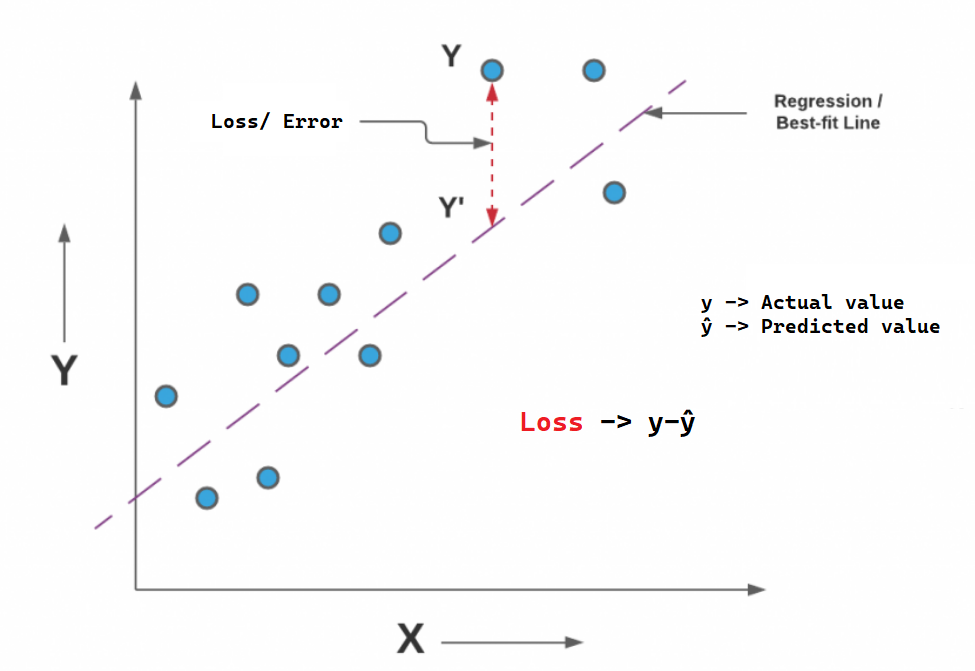

This loss is the basis of all other loss function, some loss function square this loss and take average of all other losses (MSE). And some take absolute value of it and take average of all other losses (MAE). 

<a id="mse"></a>
### 1. Regression
Regression problems are those in which target variable are continous

#### 1.1. MSE (Mean squared error)
Mean squared error (MSE) is the most commonly used loss function for regression. The loss is the mean of the squared differences between actual and predicted values. There is no ideal value of MSE, we need to focus on decreasing the mse value, less the better. We square the difference of actual and predicted value for two reason
* So that negative loss value don't get cancel out from positive loss value.
* To add high penalty for higher loss.

**Formula of MSE**
> 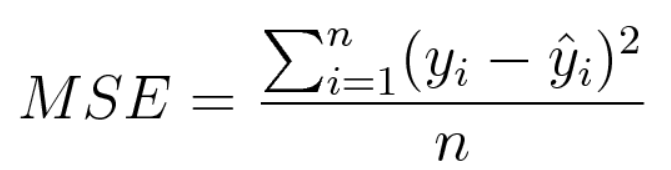

**[▲ Go To Top](#home)**

In [1]:
# dummy dataset of actual and predicted
import numpy as np
actual = np.array([12,45,26,23,46,17,90,81,30])
predicted = np.array([12,44,20,23,46,15,95,84,31])

# create a function of mse
def mse(actual, predicted):
    total_error = actual - predicted
    mse_score = np.mean(total_error**2)
    return mse_score

# lets test this
mse(actual, predicted)

8.444444444444445

In [2]:
# Python built-in fuction
from sklearn.metrics import mean_squared_error

# Calculation of Mean Squared Error (MSE)
mean_squared_error(actual, predicted)

8.444444444444445

<a id="mae"></a>
#### 1.2. MAE (Mean Absolute Error)
It is similar to mse the only difference is that instead of taking the square of each loss, we take their absolute value aka magnitude of loss. There is no ideal value of mae, less the value better it is. It is recommended to use when you outlier in the dataset.

**Formula of MAE**
> 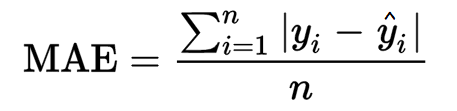

**[▲ Go To Top](#home)**

In [3]:
# dummy dataset of actual and predicted
import numpy as np
actual = np.array([12,45,26,23,46,17,90,81,30])
predicted = np.array([12,44,20,23,46,15,95,84,31])

# Create mae function
def mae(actual, predicted):
    total_error = actual - predicted
    mae_score = np.mean(np.abs(total_error))
    return mae_score 

# let's test it
mae(actual, predicted)

2.0

In [4]:
# Python built-in fuction
from sklearn.metrics import mean_absolute_error

# Calculation of Mean Squared Error (MSE)
mean_absolute_error(actual, predicted)

2.0

<a id='rmse'></a>
#### 1.3. RMSE (Root mean squared error)
RMSE is very much similar to MSE, it is just the square root of MSE. MSE is highly biased for higher values. RMSE is better in terms of reflecting performance when dealing with large error values. RMSE is more useful when lower residual values are preferred.

**Formula of RMSE**
> <img src="https://editor.analyticsvidhya.com/uploads/69457rmse.png" width="300">

**[▲ Go To Top](#home)**

In [5]:
# dummy dataset of actual and predicted
import numpy as np
actual = np.array([12,45,26,23,46,17,90,81,30])
predicted = np.array([12,44,20,23,46,15,95,84,31])

# create a function of rmse
def rmse(actual, predicted):
    total_error = actual - predicted
    mse_score = np.mean(total_error**2)
    return np.sqrt(mse_score)

# lets test this
rmse(actual, predicted)

2.9059326290271157

In [6]:
# python built-in function
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(actual, predicted, squared=False)
mse

2.9059326290271157

<a id="r2"></a>
#### 1.4. R-Squared
R-Square aka R2 score is a measure of correlation, it measures how much variance in target variable can be explained by the independent variable. In other word how much change(variability) in dependent variable is due to the change in features values. R2 score ranges from 0 to 1 where 0 being the worst meaning independent and dependent variables are not correlated at all, and 1 represent the best meaning the independent and dependent variables are fully correlated.<br>
**Note:** R2 score doesn't tell the preditive accuracy of the model.

**Formula of R-Squared**
> <img src="https://miro.medium.com/max/2812/1*_HbrAW-tMRBli6ASD5Bttw.png" width="400">

**[▲ Go To Top](#home)**

In [7]:
# dummy dataset of actual and predicted
import numpy as np
actual = np.array([12,45,26,23,46,17,90,81,30])
predicted = np.array([12,44,20,23,46,15,95,84,31])

# Create rsquared function
def r2(actual, predicted):
    sst = sum((actual - np.mean(actual)) **2)
    ssr = sum((predicted - actual) **2)
    
    r2 = 1-(ssr/sst)
    return r2

# let's test it
r2(actual, predicted)

0.9875997099347353

In [8]:
# Python built-in fuction
from sklearn.metrics import r2_score

# Calculation of Mean Squared Error (MSE)
r2_score(actual, predicted)

0.9875997099347353

<a id="ar2"></a>
#### 1.5. Adjusted R-Squared
Adjusted R-Squared is the little better version of R-Squared. The problem with R-Squared was that it value increases when the more feature were added, even if doesn't explains the variability of the target variable. So to fix this we use Adjusted R-Square which penalizes the model and reduce the value of R-Square for adding irrelevant features (features which doesn't explains the variabaility of the target variable and doesn't increase the value of R-Squared significantly).

**Formula of Adjusted R-Squared**
> 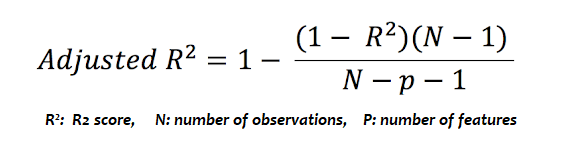

**[▲ Go To Top](#home)**

In [9]:
# dummy dataset of actual and predicted
import numpy as np
actual = np.array([12,45,26,23,46,17,90,81,30])
predicted = np.array([12,44,20,23,46,15,95,84,31])

# Create rsquared function
def ar2(actual, predicted):
    sst = sum((actual - np.mean(actual)) **2)
    ssr = sum((predicted - actual) **2)    
    r2 = 1-(ssr/sst)
    
    n = len(actual)
    ar2 = 1-(1-r2)*(n-1)/(n-1-1)
    return ar2

# let's test it
ar2(actual, predicted)

0.9858282399254118

we don't have built-in function for calculating adjusted r2 score

<a id='bce'></a>
### 2.1. Classification/Binary
The name is pretty self-explanatory. Binary Classification refers to assigning an object into one of two classes. This classification is based on a rule applied to the input feature vector. For example, classifying an email as spam or not spam based on, say its subject line, is binary classification.
#### 2.1.1. Binary cross entropy
Binary cross entropy compares each of the predicted probabilities to actual class output which can be either 0 or 1. It then calculates the score that penalizes the probabilities based on the distance from the expected value. That means how close or far from the actual value.

**Formula of Binary cross entropy**
> 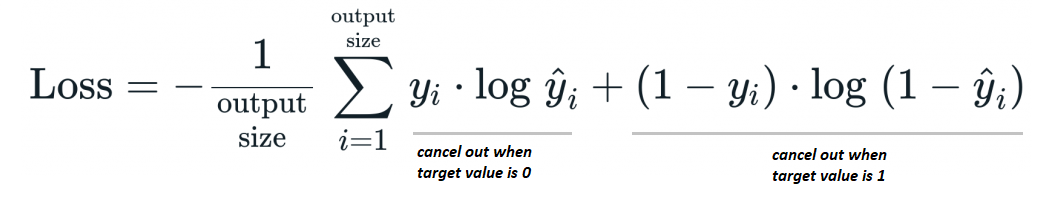

**[▲ Go To Top](#home)**

In [10]:
# dummy dataset of actual and predicted
import numpy as np
actual = np.array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1])
predicted = np.array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

def binary_cross_entropy(actual, predicted):
    # replacing 1 = 0.999 and 0 = 1e-15 for avoiding zerodivisionerror in log(0)
    epsilon = 1e-15
    new_predicted = np.array([max(i, epsilon) if i==0 else min(i, 1-epsilon) for i in predicted])  
    
    # calculating binary cross entropy
    bce = -np.mean(actual*np.log(new_predicted) + \
                 ((1-actual)*np.log(1-new_predicted)))
    return bce

binary_cross_entropy(actual, predicted)

6.907835238725157

In [11]:
# python built-in function
from sklearn.metrics import log_loss
log_loss(actual, predicted)

6.907835238725157

<a id='hl'></a>
#### 2.1.2. Hinge Loss
The hinge loss is a loss function used for training classifiers, most notably the SVM. A negative distance from the boundary incurs a high hinge loss. This essentially means that anything farther than the closest points(support vectors) contributes nothing to the loss because of the "hinge" (the max) in the function. Hinge Loss not only penalizes the wrong predictions but also the right predictions that are not confident. It classifies with class labels -1 and 1. [read more](https://towardsdatascience.com/a-definitive-explanation-to-hinge-loss-for-support-vector-machines-ab6d8d3178f1)

**Formula of Hinge Loss** 
> 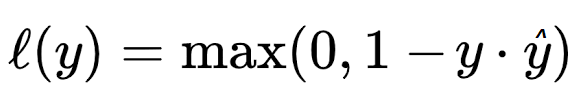

**[▲ Go To Top](#home)**

In [12]:
# dummy dataset of actual and predicted
import numpy as np
actual = np.array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1])
predicted = np.array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1])

def hinge(actual, predicted):
    # replacing 0 = -1 
    new_predicted = np.array([-1 if i==0 else i for i in predicted])
    new_actual = np.array([-1 if i==0 else i for i in actual])
    
    # calculating hinge loss
    hinge_loss = np.mean([max(0, 1-x*y) for x, y in zip(new_actual, new_predicted)])
    return hinge_loss

new_predicted = np.array([-1 if i==0 else i for i in predicted])
hinge(actual, new_predicted)

0.5

In [13]:
# python built-in function
from sklearn.metrics import hinge_loss
hinge_loss(actual, new_predicted)

0.5

<a id='cm'></a>
#### 2.1.3 Confusion Matrix
A confusion matrix is a table that summarizing the performance of a classification algorithm on a set of test data for which the true values are known. It compares the actual output with the predicted output and gives the summary of total correct/wrong classification.

**How confusion matrix looks**
> 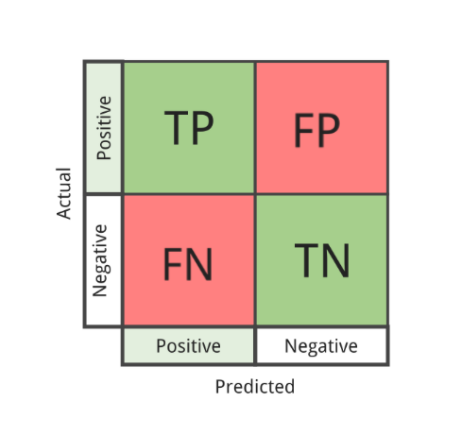

**[▲ Go To Top](#home)**

In [14]:
import numpy as np
actual = np.array([0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0])
predicted = np.array([0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1])

# function for creating confusion matrix
def cmatrix(actual, predicted):
    class_n = list(set(actual))
    tClass = len(class_n)
    
    cm_matrix = []
    # actual vs predicted comparison
    for i in range(tClass):
        for j in range(tClass):        
            is_correct = [True if a == class_n[i] and p==class_n[j] else False\
                          for a, p in zip(actual, predicted)]
            
            cm_matrix.append(sum(is_correct))
    # output
    return np.array(cm_matrix).reshape(tClass, tClass)

# lets checkout our confusion matrix
cmatrix(actual, predicted)

array([[6, 3],
       [2, 7]])

In [15]:
# python built-in function
from sklearn.metrics import confusion_matrix
confusion_matrix(actual, predicted)

array([[6, 3],
       [2, 7]], dtype=int64)

<a id='apr'></a>
#### Accuracy, Precision And, Recall
Accuracy precision, recall is kind-off part of confusion matrix, it give us quick understanding of performance of our model. 
* **Accuracy** tells us how much records were correctly classified by our model for example if the actual value was cat and our model correctly classified as cat. It can be calculated 
> 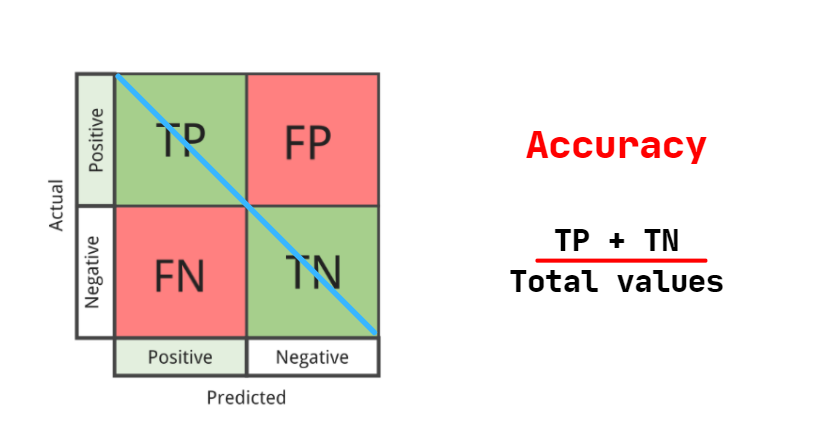
* **Precision** aka **Specificity** is calculated for each class of the target. It tells us how many prediction of a particular class out of total prediction of that class is correct.
> 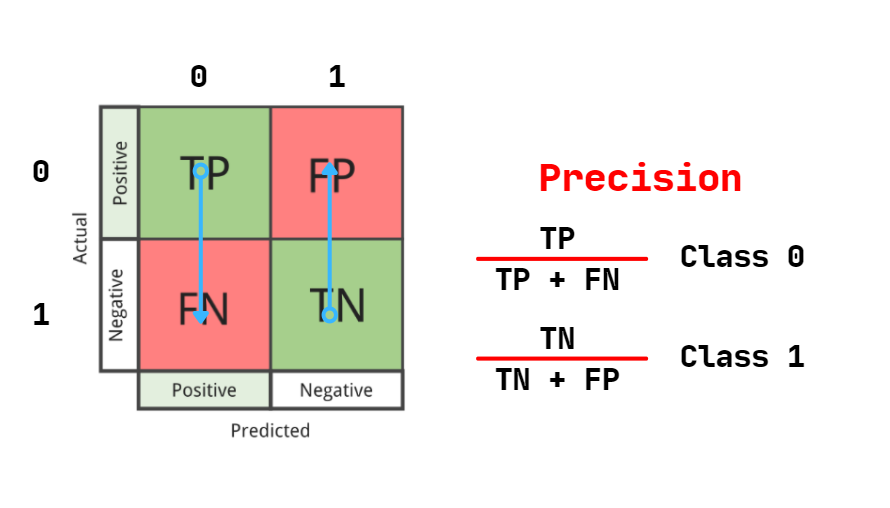
* **Recall** aka **Sensitivity** is also calculated for each class of the target. It tells how many prediction of a particular class out of total value of that class is correctly classified 
> 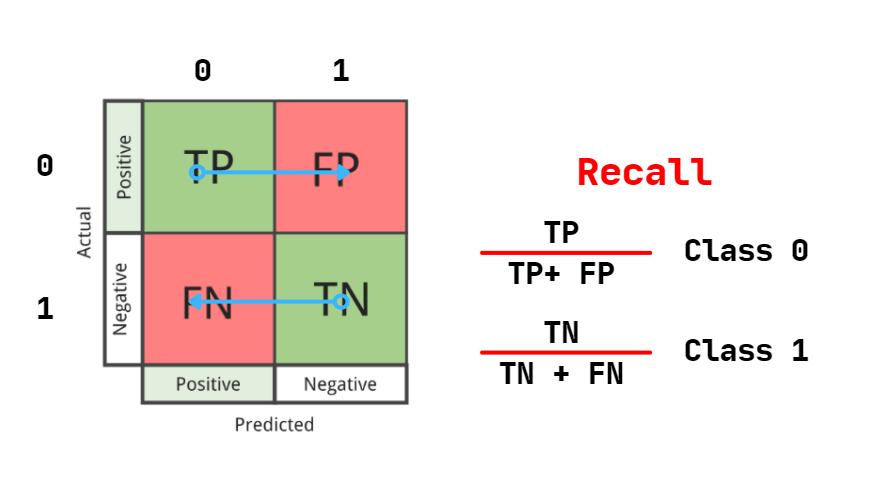
**Example of Accuracy, Precision and Recall**
> 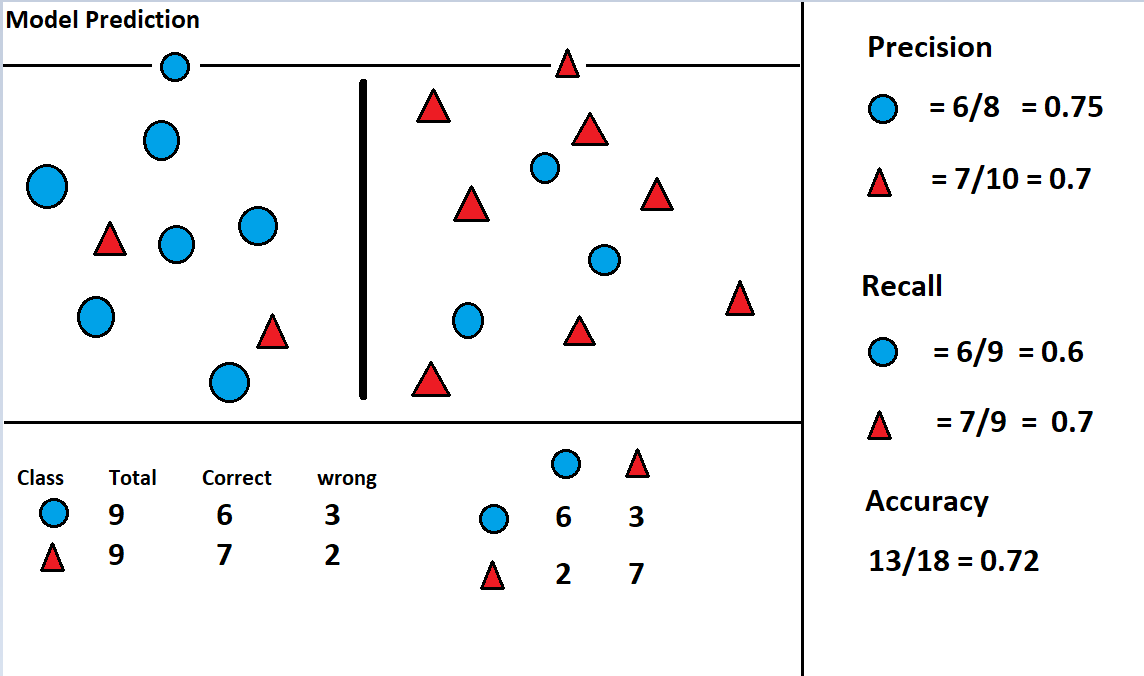

**[▲ Go To Top](#home)**

In [16]:
import numpy as np
actual = np.array([0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0])
predicted = np.array([0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1])

def acc_pre_rec(actual, prediction):
    classes = list(set(actual))
    tClass = len(classes)
    
    correct_c = {}      
    # count of correct classified classes
    for i in range(tClass):
        correct_c[classes[i]] = sum([True if a==classes[i] and p==classes[i] else False \
                                     for a, p in zip(actual, predicted)])
        
    score = {}   
    # Accuracy 
    score['Accuracy'] = sum(correct_c.values())/len(actual)
    # Precision
    score['Precision'] = [correct_c[i]/sum(predicted==i) for i in classes]
    # Recall 
    score['Recall'] = [correct_c[i]/sum(actual==i) for i in classes]
           
    return score

acc_pre_rec(actual, predicted)

{'Accuracy': 0.7222222222222222,
 'Precision': [0.75, 0.7],
 'Recall': [0.6666666666666666, 0.7777777777777778]}

In [17]:
# python built-in function
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(actual, predicted))

              precision    recall  f1-score   support

           0       0.75      0.67      0.71         9
           1       0.70      0.78      0.74         9

    accuracy                           0.72        18
   macro avg       0.72      0.72      0.72        18
weighted avg       0.73      0.72      0.72        18



<a id='auc'></a>
#### ROC-AUC curve
AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. By analogy, the Higher the AUC, the better the model is at distinguishing between patients with the disease and no disease.

**Terms used in ROC-AUC**
> 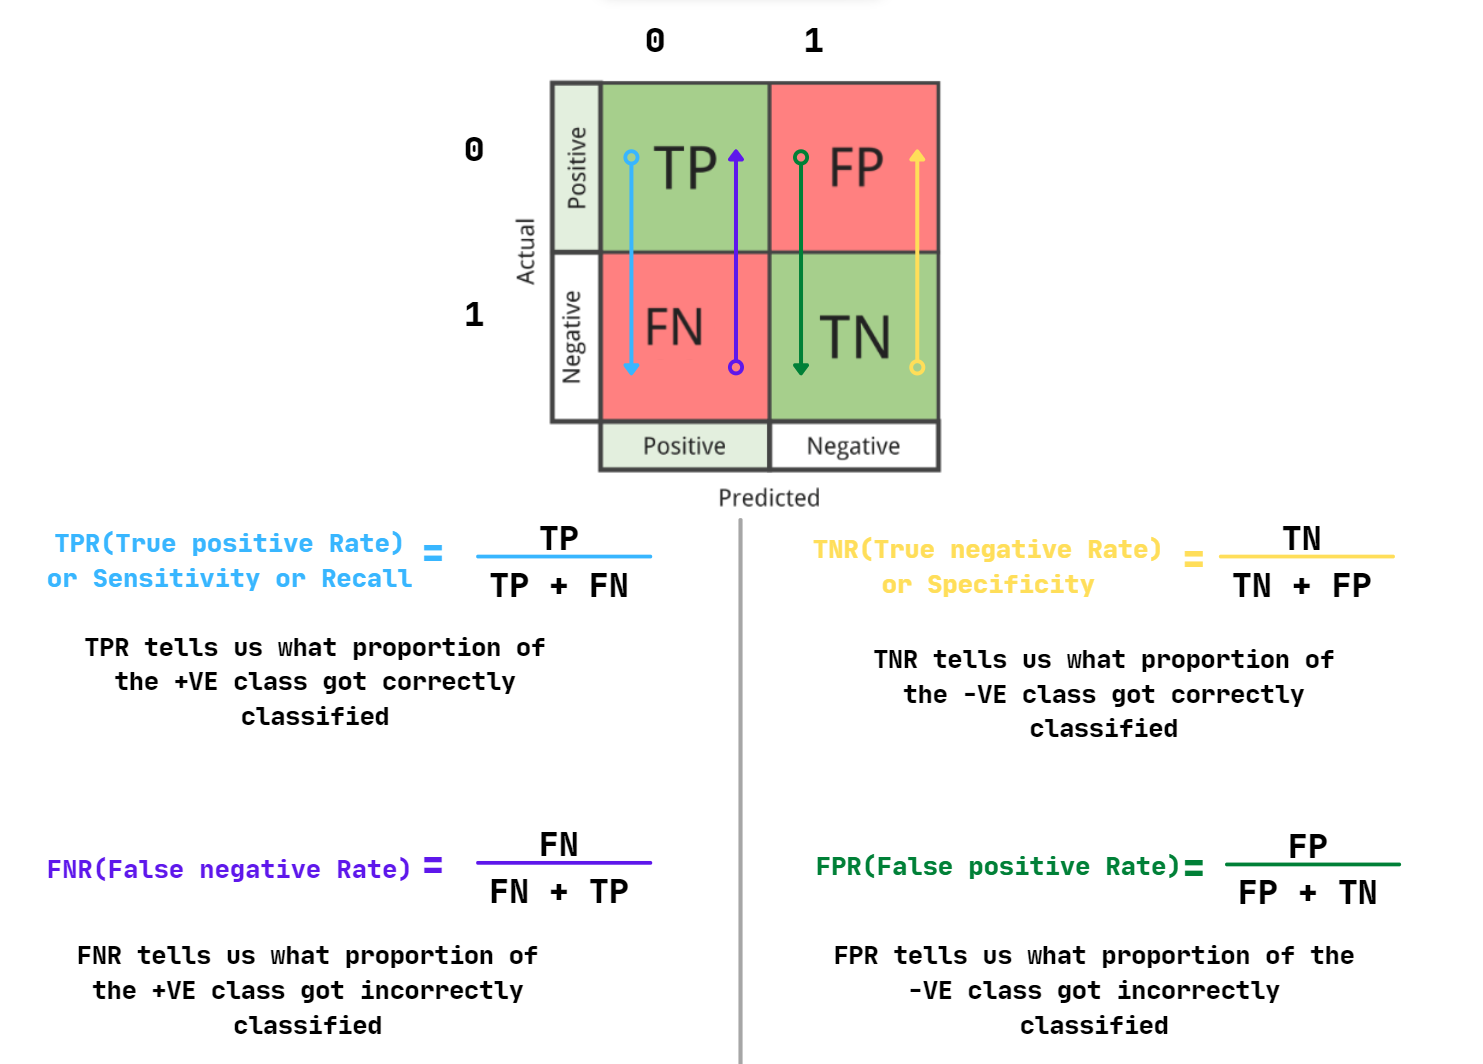

**[▲ Go To Top](#home)**